In [1]:
import json, pandas as pd
import matplotlib.pyplot as plt

In [2]:
def highlight_max(s):
    is_max = s == s.max()
    return ['font-weight: bold' if v else '' for v in is_max]

In [3]:
baseline = {
    "date": "2023-12-23",
    "model": "mistral-7b-instruct-v0.2.Q6_K",
    "version": "baseline",
    "temperature": 0.0,
    "aware_acc": 0.7065868263473054,
    "aware_rho": 0.46095769289667354,
    "agnostic_acc": 0.6492985971943888, 
    "agnostic_rho": 0.3801408906585249,
    "avg_acc": 0.6779427117708471,
    "avg_rho": 0.42054929177759925
}

In [4]:
records = json.load(open('validation_runs.json', 'r'))
df = pd.DataFrame.from_records(records)
df.loc[len(df.index)] = baseline
df_for_table = df[[ 'date', 'version', 'model', 'temperature', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ]].sort_values(by='date')
styled_df = df_for_table.style.apply(highlight_max, subset=['agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', 'avg_acc', 'avg_rho'])
styled_df

,date,version,model,temperature,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
38,2023-12-23,baseline,mistral-7b-instruct-v0.2.Q6_K,0.000000,0.649299,0.380141,0.706587,0.460958,0.677943,0.420549
8,2024-01-09,v1,gpt-4,0.700000,0.801603,0.679521,0.762475,0.555941,0.782039,0.617731
0,2024-01-09,v1,gpt-3.5-turbo,0.700000,0.725451,0.549040,0.712575,0.541777,0.719013,0.545408
16,2024-01-10,v1-persona,gpt-3.5-turbo,0.700000,0.715431,0.575568,0.720559,0.535034,0.717995,0.555301
14,2024-01-10,v1-persona-examples,gpt-3.5-turbo,0.700000,0.671343,0.493688,0.712575,0.524608,0.691959,0.509148
2,2024-01-11,v3,gpt-3.5-turbo,1.200000,0.735471,0.600531,0.722555,0.516681,0.729013,0.558606
4,2024-01-11,v2,gpt-3.5-turbo,0.200000,0.711423,0.488756,0.742515,0.528502,0.726969,0.508629
6,2024-01-11,v2,gpt-3.5-turbo,0.700000,0.701403,0.526440,0.742515,0.569994,0.721959,0.548217
7,2024-01-11,v1-conservative,gpt-3.5-turbo,0.700000,0.701403,0.540491,0.734531,0.568859,0.717967,0.554675
9,2024-01-11,v3,gpt-3.5-turbo,0.700000,0.745491,0.584922,0.718563,0.508341,0.732027,0.546631


In [5]:
print(df_for_table.to_markdown())

|    | date       | version                            | model                         |   temperature |   agnostic_acc |   agnostic_rho |   aware_acc |   aware_rho |   avg_acc |   avg_rho |
|---:|:-----------|:-----------------------------------|:------------------------------|--------------:|---------------:|---------------:|------------:|------------:|----------:|----------:|
| 38 | 2023-12-23 | baseline                           | mistral-7b-instruct-v0.2.Q6_K |           0   |       0.649299 |       0.380141 |    0.706587 |    0.460958 |  0.677943 |  0.420549 |
|  8 | 2024-01-09 | v1                                 | gpt-4                         |           0.7 |       0.801603 |       0.679521 |    0.762475 |    0.555941 |  0.782039 |  0.617731 |
|  0 | 2024-01-09 | v1                                 | gpt-3.5-turbo                 |           0.7 |       0.725451 |       0.54904  |    0.712575 |    0.541777 |  0.719013 |  0.545408 |
| 16 | 2024-01-10 | v1-persona               

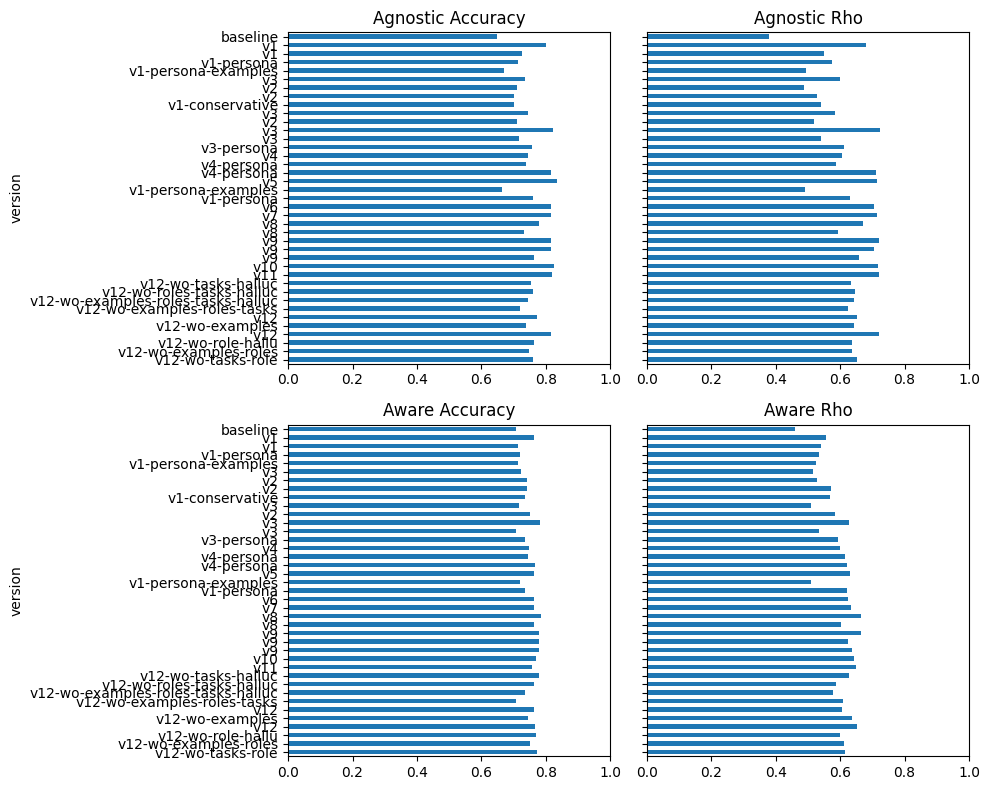

In [6]:
df_agnostic_acc = df[['version', 'date', 'agnostic_acc']].sort_values(by='date', ascending=False)
df_agnostic_rho = df[['version', 'date', 'agnostic_rho']].sort_values(by='date', ascending=False)
df_aware_acc = df[['version', 'date', 'aware_acc']].sort_values(by='date', ascending=False)
df_aware_rho = df[['version', 'date', 'aware_rho']].sort_values(by='date', ascending=False)

# Create a 2x2 subplot layout
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Plotting each DataFrame on a specific subplot
df_agnostic_acc.plot(kind='barh', x='version', legend=False, ax=axs[0, 0])
axs[0, 0].set_title('Agnostic Accuracy')
axs[0, 0].set_xlim(0, 1)

df_agnostic_rho.plot(kind='barh', legend=False, ax=axs[0, 1])
axs[0, 1].set_title('Agnostic Rho')
axs[0, 1].set_yticklabels([])
axs[0, 1].set_xlim(0, 1)

df_aware_acc.plot(kind='barh', x='version', legend=False, ax=axs[1, 0])
axs[1, 0].set_title('Aware Accuracy')
axs[1, 0].set_xlim(0, 1)

df_aware_rho.plot(kind='barh', legend=False, ax=axs[1, 1])
axs[1, 1].set_title('Aware Rho')
axs[1, 1].set_yticklabels([])
axs[1, 1].set_xlim(0, 1)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [7]:
df2 = df.query('date == "2024-01-25"')
df2

,version,model,date,temperature,aware_acc,aware_rho,agnostic_acc,agnostic_rho,avg_acc,avg_rho,val.model-aware,val.model-agnostic
28,v12,gpt-3.5-turbo,2024-01-25,1.2,0.764471,0.605591,0.773547,0.652249,0.769009,0.628920,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
29,v12-wo-examples,gpt-3.5-turbo,2024-01-25,1.2,0.744511,0.636529,0.739479,0.642820,0.741995,0.639674,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
30,v12-wo-examples-roles,gpt-3.5-turbo,2024-01-25,1.2,0.750499,0.611229,0.749499,0.636000,0.749999,0.623614,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
31,v12-wo-examples-roles-tasks,gpt-3.5-turbo,2024-01-25,1.2,0.708583,0.608013,0.721443,0.625697,0.715013,0.616855,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
32,v12-wo-examples-roles-tasks-halluc,gpt-3.5-turbo,2024-01-25,1.2,0.736527,0.576088,0.745491,0.641905,0.741009,0.608996,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
33,v12-wo-roles-tasks-halluc,gpt-3.5-turbo,2024-01-25,1.2,0.762475,0.585752,0.759519,0.644577,0.760997,0.615165,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
34,v12-wo-tasks-halluc,gpt-3.5-turbo,2024-01-25,1.2,0.780439,0.626477,0.753507,0.632228,0.766973,0.629353,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
35,v12-wo-tasks-role,gpt-3.5-turbo,2024-01-25,1.2,0.774451,0.614301,0.759519,0.651428,0.766985,0.632865,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
36,v12-wo-role-hallu,gpt-3.5-turbo,2024-01-25,1.2,0.770459,0.598199,0.763527,0.635667,0.766993,0.616933,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."
37,v12,gpt-4-1106-preview,2024-01-25,1.2,0.766467,0.651745,0.817635,0.721873,0.792051,0.686809,"[{'label': 'Hallucination', 'p(Hallucination)'...","[{'label': 'Not Hallucination', 'p(Hallucinati..."


In [8]:
df2.describe()

,temperature,aware_acc,aware_rho,agnostic_acc,agnostic_rho,avg_acc,avg_rho
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,1.200000e+00,0.755888,0.611392,0.758317,0.648444,0.757102,0.629918
std,2.340556e-16,0.021499,0.022655,0.025300,0.027086,0.021030,0.022051
min,1.200000e+00,0.708583,0.576088,0.721443,0.625697,0.715013,0.608996
25%,1.200000e+00,0.746008,0.600047,0.746493,0.635750,0.743996,0.616875
50%,1.200000e+00,0.763473,0.609621,0.756513,0.642363,0.763985,0.626267
75%,1.200000e+00,0.769461,0.623433,0.762525,0.649715,0.766991,0.631987
max,1.200000e+00,0.780439,0.651745,0.817635,0.721873,0.792051,0.686809


In [12]:
df3 = df2[[ 'version', 'model', 'agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho" ]].round(3)
df3

,version,model,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
28,v12,gpt-3.5-turbo,0.774,0.652,0.764,0.606,0.769,0.629
29,v12-wo-examples,gpt-3.5-turbo,0.739,0.643,0.745,0.637,0.742,0.640
30,v12-wo-examples-roles,gpt-3.5-turbo,0.749,0.636,0.750,0.611,0.750,0.624
31,v12-wo-examples-roles-tasks,gpt-3.5-turbo,0.721,0.626,0.709,0.608,0.715,0.617
32,v12-wo-examples-roles-tasks-halluc,gpt-3.5-turbo,0.745,0.642,0.737,0.576,0.741,0.609
33,v12-wo-roles-tasks-halluc,gpt-3.5-turbo,0.760,0.645,0.762,0.586,0.761,0.615
34,v12-wo-tasks-halluc,gpt-3.5-turbo,0.754,0.632,0.780,0.626,0.767,0.629
35,v12-wo-tasks-role,gpt-3.5-turbo,0.760,0.651,0.774,0.614,0.767,0.633
36,v12-wo-role-hallu,gpt-3.5-turbo,0.764,0.636,0.770,0.598,0.767,0.617
37,v12,gpt-4-1106-preview,0.818,0.722,0.766,0.652,0.792,0.687


In [13]:
df3.loc[len(df.index)] = baseline
df3_for_table = df3.sort_values(by='avg_acc', ascending=False)
styled_df3 = df3_for_table.style.apply(highlight_max, subset=['agnostic_acc', 'agnostic_rho', 'aware_acc', 'aware_rho', "avg_acc", "avg_rho"])
styled_df3

,version,model,agnostic_acc,agnostic_rho,aware_acc,aware_rho,avg_acc,avg_rho
37,v12,gpt-4-1106-preview,0.818000,0.722000,0.766000,0.652000,0.792000,0.687000
28,v12,gpt-3.5-turbo,0.774000,0.652000,0.764000,0.606000,0.769000,0.629000
34,v12-wo-tasks-halluc,gpt-3.5-turbo,0.754000,0.632000,0.780000,0.626000,0.767000,0.629000
35,v12-wo-tasks-role,gpt-3.5-turbo,0.760000,0.651000,0.774000,0.614000,0.767000,0.633000
36,v12-wo-role-hallu,gpt-3.5-turbo,0.764000,0.636000,0.770000,0.598000,0.767000,0.617000
33,v12-wo-roles-tasks-halluc,gpt-3.5-turbo,0.760000,0.645000,0.762000,0.586000,0.761000,0.615000
30,v12-wo-examples-roles,gpt-3.5-turbo,0.749000,0.636000,0.750000,0.611000,0.750000,0.624000
29,v12-wo-examples,gpt-3.5-turbo,0.739000,0.643000,0.745000,0.637000,0.742000,0.640000
32,v12-wo-examples-roles-tasks-halluc,gpt-3.5-turbo,0.745000,0.642000,0.737000,0.576000,0.741000,0.609000
31,v12-wo-examples-roles-tasks,gpt-3.5-turbo,0.721000,0.626000,0.709000,0.608000,0.715000,0.617000


In [11]:
print(df3.to_latex(index=False))

\begin{tabular}{lrrrrrr}
\toprule
version & agnostic_acc & agnostic_rho & aware_acc & aware_rho & avg_acc & avg_rho \\
\midrule
v12 & 0.774000 & 0.652000 & 0.764000 & 0.606000 & 0.769000 & 0.629000 \\
v12-wo-examples & 0.739000 & 0.643000 & 0.745000 & 0.637000 & 0.742000 & 0.640000 \\
v12-wo-examples-roles & 0.749000 & 0.636000 & 0.750000 & 0.611000 & 0.750000 & 0.624000 \\
v12-wo-examples-roles-tasks & 0.721000 & 0.626000 & 0.709000 & 0.608000 & 0.715000 & 0.617000 \\
v12-wo-examples-roles-tasks-halluc & 0.745000 & 0.642000 & 0.737000 & 0.576000 & 0.741000 & 0.609000 \\
v12-wo-roles-tasks-halluc & 0.760000 & 0.645000 & 0.762000 & 0.586000 & 0.761000 & 0.615000 \\
v12-wo-tasks-halluc & 0.754000 & 0.632000 & 0.780000 & 0.626000 & 0.767000 & 0.629000 \\
v12-wo-tasks-role & 0.760000 & 0.651000 & 0.774000 & 0.614000 & 0.767000 & 0.633000 \\
v12-wo-role-hallu & 0.764000 & 0.636000 & 0.770000 & 0.598000 & 0.767000 & 0.617000 \\
v12 & 0.818000 & 0.722000 & 0.766000 & 0.652000 & 0.792000 & 0.6